<a href="https://colab.research.google.com/github/puskuriashwitha/-Task-1-StudentsPerformance/blob/main/Task_1(StudentsPerformance).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape of the dataset: (30, 5)

First 5 rows:
    Math_Score  Reading_Score  Writing_Score  Placement_Score  Club_Join_Date
0          65             86             67               78            2021
1          64             85             71               80            2019
2          76             77             77               84            2021
3          80             76             75               75            2021
4          63             91             62               90            2019

Data Types:
 Math_Score         int64
Reading_Score      int64
Writing_Score      int64
Placement_Score    int64
Club_Join_Date     int64
dtype: object

Missing values in each column:

Math_Score         0
Reading_Score      0
Writing_Score      0
Placement_Score    0
Club_Join_Date     0
dtype: int64

Actual column names after loading:

['Math_Score', 'Reading_Score', 'Writing_Score', 'Placement_Score', 'Club_Join_Date']

Data after Label Encoding:
    Math_Score  Reading_Score  Writin

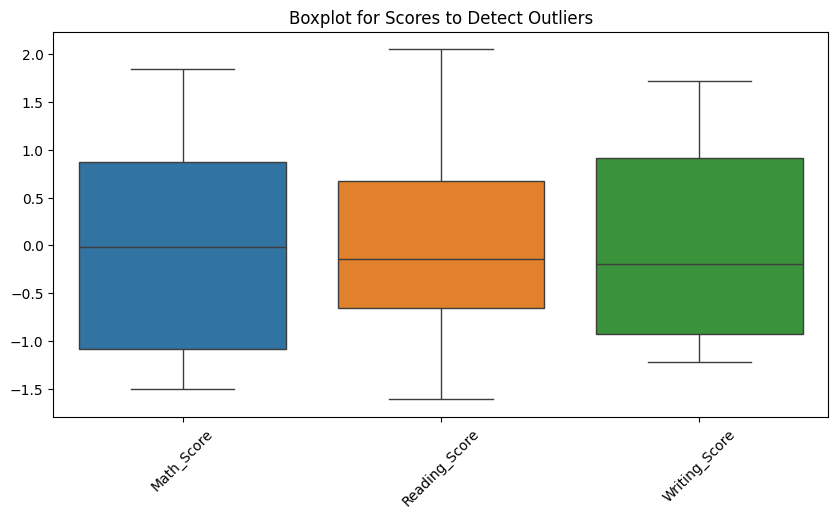


Shape after removing outliers: (30, 5)

Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Math_Score       30 non-null     float64
 1   Reading_Score    30 non-null     float64
 2   Writing_Score    30 non-null     float64
 3   Placement_Score  30 non-null     int64  
 4   Club_Join_Date   30 non-null     int64  
dtypes: float64(3), int64(2)
memory usage: 1.3 KB
None

Cleaned data saved successfully as StudentsPerformance_Cleaned.csv!


In [2]:
# 1️⃣ Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 2️⃣ Load the dataset
df = pd.read_csv("StudentsPerformance.csv")

# 3️⃣ Check basic info
print("Shape of the dataset:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nData Types:\n", df.dtypes)

# 4️⃣ Check for missing values
print("\nMissing values in each column:\n")
print(df.isnull().sum())

# 5️⃣ Print column names to confirm actual names
print("\nActual column names after loading:\n")
print(df.columns.tolist())

# 6️⃣ Convert categorical columns to numbers (Label Encoding)
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

print("\nData after Label Encoding:\n", df.head())

# 7️⃣ Standardize the numerical columns
scaler = StandardScaler()

# ✅ Correct column names based on your dataset (check your print above if needed)
score_cols = ['Math_Score', 'Reading_Score', 'Writing_Score']

# Check before scaling
print("\nColumns before scaling:\n", df.columns.tolist())

# Apply scaling only on these columns
df[score_cols] = scaler.fit_transform(df[score_cols])

print("\nData after Standardizing Scores:\n", df.head())

# 8️⃣ Visualize outliers using boxplots
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[score_cols])
plt.title("Boxplot for Scores to Detect Outliers")
plt.xticks(rotation=45)
plt.show()

# 9️⃣ Remove outliers using IQR method
def remove_outliers_iqr(dataframe, columns):
    for col in columns:
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        dataframe = dataframe[(dataframe[col] >= lower) & (dataframe[col] <= upper)]
    return dataframe

df_cleaned = remove_outliers_iqr(df, score_cols)

print("\nShape after removing outliers:", df_cleaned.shape)

# 🔟 Final check of cleaned data info
print("\nCleaned Data Info:")
print(df_cleaned.info())

# 1️⃣1️⃣ (Optional) Save cleaned data to a new CSV
df_cleaned.to_csv("StudentsPerformance_Cleaned.csv", index=False)
print("\nCleaned data saved successfully as StudentsPerformance_Cleaned.csv!")